In [1]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
import matplotlib.pyplot as plt
import torch

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.data.datasets import register_coco_instances

In [2]:
dataset = 'cityscapes'
annot_dir = './cityscapes/annotations'
imgs_dir = './cityscapes'

for split in ['train', 'val']: 
    annot_path = os.path.join(annot_dir, f'instancesonly_filtered_gtFine_{split}.json')
    d_name = dataset + f'_{split}'
    register_coco_instances(d_name, {}, annot_path, imgs_dir)

# Load dataset
dataset_dicts = DatasetCatalog.get('cityscapes_val')
metadata = MetadataCatalog.get('cityscapes_val')

[03/21 17:32:23 d2.data.datasets.coco]: Loaded 500 images in COCO format from ./cityscapes/annotations/instancesonly_filtered_gtFine_val.json


In [3]:
#ln -s /Users/giakhang/Downloads/output_yolof_uni_matcher ./

In [4]:
import argparse

class Args(argparse.Namespace):
    config_file='khang_net/configs/yolof/yolof_resnet_50_1x.py'
    eval_only=False
    num_gpus=1
    num_machines=1
    resume=False

args = Args()

In [15]:
from detectron2.model_zoo import get_config
from detectron2.config import LazyConfig
from detectron2.config.instantiate import instantiate


cfg = LazyConfig.load("khang_net/configs/yolof/yolof_resnet_50_1x.py")
cfg.train.device = 'mps'
cfg.dataloader.evaluator.dataset_name = 'cityscapes_train'
cfg.dataloader.train.dataset.names = 'cityscapes_train'
cfg.dataloader.test.dataset.names = 'cityscapes_val'
cfg.dataloader.train.total_batch_size = 1
cfg.dataloader.train.mapper.use_instance_mask = True


cfg.model.num_classes = 9

In [16]:
yolof = instantiate(cfg.model)
yolof.to(cfg.train.device)

YOLOF(
  (backbone): ResNet(
    (stem): BasicStem(
      (conv1): Conv2d(
        3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
        (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
      )
    )
    (res2): Sequential(
      (0): BottleneckBlock(
        (shortcut): Conv2d(
          64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
        )
        (conv1): Conv2d(
          64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
        (conv2): Conv2d(
          64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
        (conv3): Conv2d(
          64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
        )
      )
      (1): BottleneckBlock(
        (

In [17]:
from detectron2.checkpoint import DetectionCheckpointer
DetectionCheckpointer(yolof).load('./output_yolof_uni_matcher/model_final.pth')

[03/21 17:35:52 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output_yolof_uni_matcher/model_final.pth ...


{'trainer': {'iteration': 22499,
  'hooks': {'LRScheduler': {'base_lrs': [0.002505,
     0.002505,
     0.002505,
     0.002505,
     0.002505,
     0.002505,
     0.002505,
     0.002505,
     0.002505,
     0.002505,
     0.002505,
     0.002505,
     0.002505,
     0.002505,
     0.002505,
     0.002505,
     0.002505,
     0.002505,
     0.002505,
     0.002505,
     0.002505,
     0.002505,
     0.002505,
     0.002505,
     0.002505,
     0.002505,
     0.002505,
     0.002505,
     0.002505,
     0.002505,
     0.002505,
     0.002505,
     0.002505,
     0.002505,
     0.002505,
     0.002505,
     0.002505,
     0.002505,
     0.002505,
     0.002505,
     0.002505,
     0.002505,
     0.03,
     0.0075,
     0.03,
     0.03,
     0.03,
     0.0075,
     0.03,
     0.03,
     0.03,
     0.0075,
     0.03,
     0.03,
     0.03,
     0.0075,
     0.03,
     0.03,
     0.03,
     0.0075,
     0.03,
     0.03,
     0.03,
     0.0075,
     0.03,
     0.03,
     0.03,
     0.0075,
 

In [18]:
dataloader = instantiate(cfg.dataloader.train)

[03/21 17:36:12 d2.data.datasets.coco]: Loading ./cityscapes/annotations/instancesonly_filtered_gtFine_train.json takes 16.31 seconds.
[03/21 17:36:12 d2.data.datasets.coco]: Loaded 2975 images in COCO format from ./cityscapes/annotations/instancesonly_filtered_gtFine_train.json
[03/21 17:36:12 d2.data.build]: Removed 10 images with no usable annotations. 2965 images left.
[03/21 17:36:12 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in training: [ResizeShortestEdge(short_edge_length=[800], max_size=1333, sample_style='choice'), RandomFlip()]
[03/21 17:36:12 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[03/21 17:36:12 d2.data.common]: Serializing 2965 elements to byte tensors and concatenating them all ...
[03/21 17:36:14 d2.data.common]: Serialized dataset takes 97.08 MiB
[03/21 17:36:14 d2.data.build]: Making batched data loader with batch_size=1


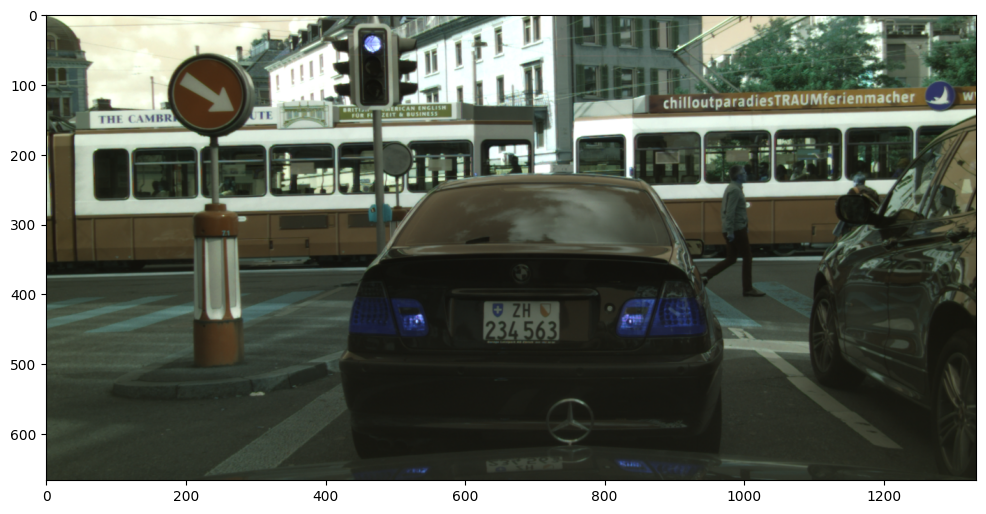

In [19]:
# show image
batch = next(iter(dataloader))
img = batch[0]['image']
img = np.ascontiguousarray(img.permute(1, 2, 0), dtype=np.uint8)

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 12))
plt.imshow(img)

In [22]:
batch[0]['image'].shape

torch.Size([3, 667, 1333])

In [23]:
batch[0]

{'file_name': './cityscapes/leftImg8bit/train/zurich/zurich_000015_000019_leftImg8bit.png',
 'height': 1024,
 'width': 2048,
 'image_id': 118,
 'image': tensor([[[195, 195, 219,  ...,  76, 100, 127],
          [181, 178, 196,  ...,  95, 114, 138],
          [166, 168, 175,  ..., 117, 128, 142],
          ...,
          [ 48,  47,  47,  ...,  28,  27,  26],
          [ 49,  46,  45,  ...,  34,  32,  31],
          [ 49,  46,  45,  ...,  37,  36,  34]],
 
         [[179, 187, 223,  ..., 107, 140, 168],
          [172, 170, 197,  ..., 121, 148, 170],
          [167, 167, 176,  ..., 143, 159, 169],
          ...,
          [ 54,  54,  54,  ...,  31,  29,  28],
          [ 54,  52,  53,  ...,  37,  35,  33],
          [ 54,  52,  53,  ...,  40,  39,  37]],
 
         [[149, 173, 202,  ...,  83, 114, 149],
          [137, 148, 167,  ..., 110, 131, 153],
          [138, 137, 129,  ..., 133, 148, 157],
          ...,
          [ 41,  41,  41,  ...,  21,  19,  19],
          [ 42,  40,  39,  ..

In [57]:
yolof.training = False
output = yolof(batch)

In [58]:
# Plot output
output = output[0]

In [59]:
output

{'instances': Instances(num_instances=43, image_height=1024, image_width=2048, fields=[pred_boxes: Boxes(tensor([[1481.7119,  324.7553, 1564.0613,  614.1691],
         [1510.6835,  367.3512, 1579.7189,  615.1976],
         [ 687.5151,  608.8310,  850.8311,  886.4498],
         [1466.5470,  294.4022, 1581.6390,  656.9669],
         [1011.7743,  545.4153, 1528.4208,  862.4450],
         [1110.5857,  615.1275, 1410.8234,  778.8293],
         [1855.7783,  746.0972, 2017.0912,  938.6445],
         [1671.4982,  301.9105, 2008.8885,  822.7227],
         [1812.6415,  673.1505, 2019.3864,  931.4313],
         [1909.6118,  214.1202, 2015.9913,  446.9745],
         [ 837.8521,  359.5796, 1315.4055,  566.8978],
         [ 926.9759,  248.2921, 1084.5404,  361.7641],
         [ 657.4901,  547.8503,  889.0180,  716.7059],
         [ 906.2571,  249.1815, 1089.4081,  313.0736],
         [1175.0942,  613.1435, 1479.7775,  762.4247],
         [1640.3344,  307.3752, 1997.8231,  749.1675],
         [1738.2

In [60]:
img.shape

(667, 1333, 3)

In [61]:
boxes = output['instances'].pred_boxes[:5].tensor.to('cpu')
classes = output['instances'].pred_classes[:5].to('cpu')

In [62]:
import torch
import numpy as np

boxes = boxes.to(torch.int32).numpy()
classes

tensor([8, 8, 7, 8, 7])

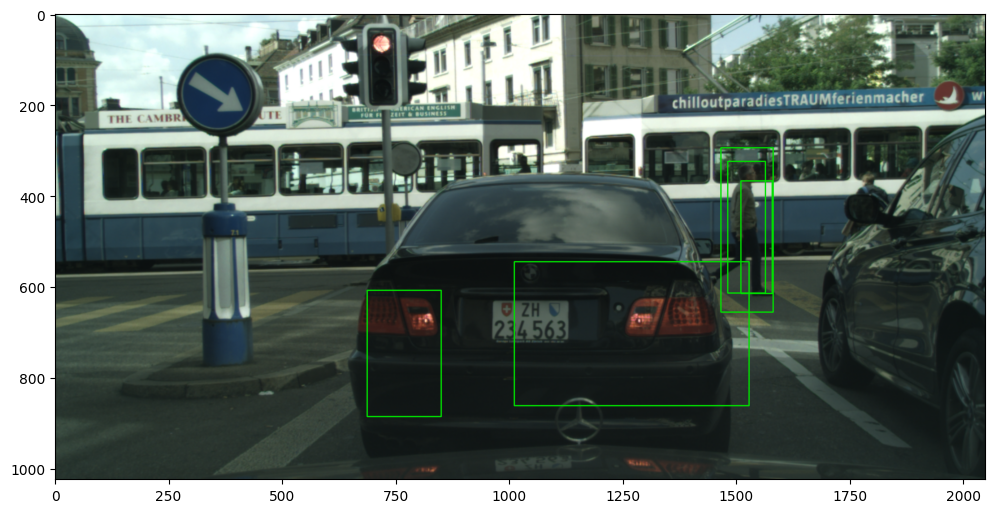

In [63]:
img = batch[0]['image'].permute(1, 2, 0).numpy()
img = np.ascontiguousarray(img)

h_w = output['instances'].image_size
img = cv2.resize(img, h_w[::-1])

for box in boxes:
    img = cv2.rectangle(img, box[:2], box[2:], (0, 225, 0), 2)
    #print(box[:2], box[2:])

_ = plt.figure(figsize=(12, 10))
plt.imshow(img[..., ::-1])

# Input size in the entire pipeline

In [18]:
images = yolof.preprocess_image(batch)

print('Original image size: {} x {}'.format(batch[0]['width'], batch[0]['height']))
print('Image size in dataloader: {} x {}'.format(images.image_sizes[0][1], images.image_sizes[0][0]))
print('Image size after preprocessing (preparing to feed to model): {} x {}'.format(images.tensor.size(-1), images.tensor.size(-2)))

Original image size: 2048 x 1024
Image size in dataloader: 1333 x 667
Image size after preprocessing (preparing to feed to model): 1333 x 667


In [19]:
images = yolof.preprocess_image(batch)

print('Image size after preprocessing (preparing to feed to model): {} x {}'.format(images.tensor.size(-1), images.tensor.size(-2)))

Image size after preprocessing (preparing to feed to model): 1333 x 667


In [20]:
features = yolof.backbone(images.tensor)
features = features['res5']

print('Feature maps size after feeding to backbone (s = s/32): {} x {}'.format(features.size(-1), features.size(-2)))

Feature maps size after feeding to backbone (s = s/32): 42 x 21


In [21]:
box_cls, box_delta = yolof.decoder(yolof.encoder(features))
anchors = yolof.anchor_generator([features])

print('Box class size: {} x {}'.format(box_cls.size(-1), box_cls.size(-2)))
print('Box delta size: {} x {}'.format(box_delta.size(-1), box_delta.size(-2)))
print('Anchors shape: {} x {}'.format(anchors[0][0].tensor.size(-1), anchors[0][0].tensor.size(0)))

assert anchors[0][0].tensor.size(0) == 5 * box_cls.size(-1) * box_cls.size(-2)

Box class size: 42 x 21
Box delta size: 42 x 21
Anchors shape: 4 x 4410


In [22]:
results = yolof.inference([box_cls], [box_delta], anchors, images.image_sizes)
result = results[0]

print('Prediction on image has shape (this shape is the shape before preprocessing): {} x {}'.format(*result.image_size[::-1]))

Prediction on image has shape (this shape is the shape before preprocessing): 1333 x 667


Result image size: 1333 x 667
Image size at this stage: 1333 x 667


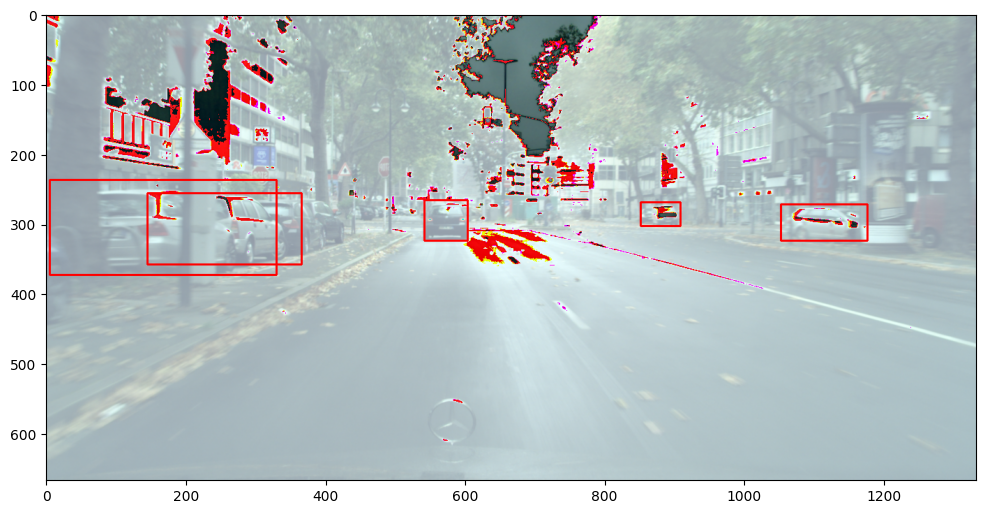

In [23]:
img_tmp = images.tensor[0].to(torch.uint8).permute(1, 2, 0).to('cpu').numpy().copy()

for box in result.pred_boxes[:5]:
    box = box.to('cpu').to(torch.int32).numpy()
    img_tmp = cv2.rectangle(img_tmp, box[:2], box[2:], (0, 0, 255), 2)

fig = plt.figure(figsize=(12, 12))
plt.imshow(img_tmp[..., ::-1])

print('Result image size: {} x {}'.format(*result.image_size[::-1]))
print('Image size at this stage: {} x {}'.format(*img_tmp.shape[:2][::-1]))

In [24]:
from detectron2.modeling.postprocessing import detector_postprocess

processed_results = []

for results_per_image, input_per_image, image_size in zip(
    results, batch, images.image_sizes):
    height = input_per_image.get('height', image_size[0])
    width = input_per_image.get('width', image_size[1])
    
    r = detector_postprocess(results_per_image, height, width)
    processed_results.append({'instances': r})

Processed result image size: 2048 x 1024
Image size after post-processing: 2048 x 1024


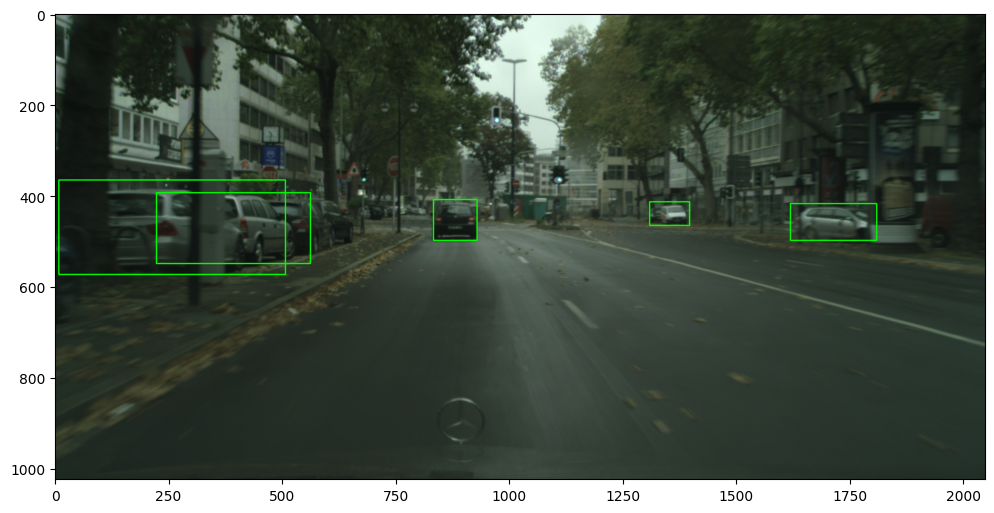

In [25]:
processed_result = processed_results[0]['instances']

img_size = processed_result.image_size

raw_img = batch[0]['image'].to(torch.uint8).permute(1, 2, 0).to('cpu').numpy().copy()
raw_img = cv2.resize(raw_img, img_size[::-1])

for box in processed_result.pred_boxes[:5]:
    box = box.to('cpu').to(torch.int32).numpy()
    raw_img = cv2.rectangle(raw_img, box[:2], box[2:], (0, 255, 0), 2)

fig = plt.figure(figsize=(12, 12))
plt.imshow(raw_img[..., ::-1])

print('Processed result image size: {} x {}'.format(*img_size[::-1]))
print('Image size after post-processing: {} x {}'.format(*raw_img.shape[:2][::-1]))

# Simulate inference stage 

In [27]:
images = yolof.preprocess_image(batch)
features = yolof.backbone(images.tensor)
features = features['res5']
box_cls, box_delta = yolof.decoder(yolof.encoder(features))
anchors = yolof.anchor_generator([features])
results = yolof.inference([box_cls], [box_delta], anchors, images.image_sizes)

In [28]:
images.image_sizes

[(402, 1333)]

In [29]:
features.shape

torch.Size([1, 2048, 13, 42])

In [30]:
results

[Instances(num_instances=8, image_height=402, image_width=1333, fields=[pred_boxes: Boxes(tensor([[406.2224, 193.8669, 464.0215, 225.5355],
         [589.9467, 181.8413, 766.7061, 350.3064],
         [323.5023, 186.2306, 348.2942, 221.2933],
         [530.9360, 177.4620, 553.7035, 188.1650],
         [565.8536, 168.3945, 587.0291, 186.7894],
         [526.6335, 169.7064, 559.8585, 186.5175],
         [522.2622, 173.1471, 563.5007, 190.2981],
         [324.6994, 186.5236, 350.8427, 222.2042]], device='mps:0',
        grad_fn=<IndexBackward0>)), scores: tensor([0.9661, 0.9293, 0.9105, 0.8441, 0.3992, 0.2076, 0.0964, 0.0759],
        device='mps:0', grad_fn=<IndexBackward0>), pred_classes: tensor([7, 7, 0, 1, 1, 1, 1, 1], device='mps:0')])]

## These lines above are viewed as ROI proposals

In [31]:
from detectron2.modeling.poolers import ROIPooler

In [32]:
pooler = ROIPooler(output_size=14, scales=(1.0/32,), sampling_ratio=0, pooler_type='ROIAlignV2')

In [33]:
proposal_boxes = [x.pred_boxes for x in results]

In [34]:
features = [features]

In [54]:
roi_maps = pooler(features, proposal_boxes)

In [55]:
roi_maps.shape

torch.Size([8, 2048, 14, 14])

In [56]:
roi_maps.device

device(type='mps', index=0)

In [57]:
from detectron2.modeling.roi_heads import MaskRCNNConvUpsampleHead
from detectron2.layers import ShapeSpec

In [99]:
mask_head = MaskRCNNConvUpsampleHead(input_shape=ShapeSpec(channels=2048, width=14, height=14),
                                     num_classes=9,
                                     conv_dims=[256])

In [100]:
mask_head

MaskRCNNConvUpsampleHead(
  (deconv): ConvTranspose2d(2048, 256, kernel_size=(2, 2), stride=(2, 2))
  (deconv_relu): ReLU()
  (predictor): Conv2d(256, 9, kernel_size=(1, 1), stride=(1, 1))
)

In [101]:
mask_head.to('mps')

MaskRCNNConvUpsampleHead(
  (deconv): ConvTranspose2d(2048, 256, kernel_size=(2, 2), stride=(2, 2))
  (deconv_relu): ReLU()
  (predictor): Conv2d(256, 9, kernel_size=(1, 1), stride=(1, 1))
)

In [102]:
x = mask_head.layers(roi_maps)

In [103]:
x.shape

torch.Size([8, 9, 28, 28])

# Simulate training stage

In [46]:
images = yolof.preprocess_image(batch)
features = yolof.backbone(images.tensor)
features = features['res5']
box_cls, box_delta = yolof.decoder(yolof.encoder(features))
anchors = yolof.anchor_generator([features])
proposals = yolof.inference([box_cls], [box_delta], anchors, images.image_sizes)

/Users/giakhang/miniconda3/envs/hope_to_public_net/lib/python3.9/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1708025539291/work/aten/src/ATen/native/TensorShape.cpp:3550.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [47]:
# Do we need to label_and_sample_proposals????

In [48]:
from detectron2.modeling.roi_heads import MaskRCNNConvUpsampleHead
from detectron2.layers import ShapeSpec

mask_head = MaskRCNNConvUpsampleHead(input_shape=ShapeSpec(channels=2048, width=14, height=14),
                                     num_classes=9,
                                     conv_dims=[256])
mask_head.to('mps')

MaskRCNNConvUpsampleHead(
  (deconv): ConvTranspose2d(2048, 256, kernel_size=(2, 2), stride=(2, 2))
  (deconv_relu): ReLU()
  (predictor): Conv2d(256, 9, kernel_size=(1, 1), stride=(1, 1))
)

In [49]:
from detectron2.modeling.poolers import ROIPooler

pooler = ROIPooler(output_size=14, scales=(1.0/32,), sampling_ratio=0, pooler_type='ROIAlignV2')
pooler.to('mps')

ROIPooler(
  (level_poolers): ModuleList(
    (0): ROIAlign(output_size=(14, 14), spatial_scale=0.03125, sampling_ratio=0, aligned=True)
  )
)

In [50]:
proposal_boxes = [x.pred_boxes.to('mps') for x in proposals]
box_features = pooler([features], proposal_boxes)
pred_mask_logits = mask_head.layers(box_features)

In [51]:
gt_instances = [x['instances'] for x in batch]

In [52]:
gt_masks = []

for instances_per_image in gt_instances:
    gt_masks_per_image = instances_per_image.gt_masks.crop_and_resize(
        instances_per_image.gt_boxes.tensor, 14)
    gt_masks.append(gt_masks_per_image.to(device='mps'))

In [53]:
gt_masks_per_image = gt_masks[0].to('cpu')

In [64]:
gt_masks_per_image.shape

torch.Size([5, 14, 14])